<a href="https://colab.research.google.com/github/Georgia-MAX-holic/footprints/blob/main/PJ/rainbowSIX/new/R6_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 

- install category_encoders
- google.colab import drive
- import pandas as pd 
- plt 
- seaborn
- df_operators
- df_objectives

In [175]:
!pip install category_encoders

from google.colab import drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/gdrive', force_remount=True)
pathA = '/content/gdrive/MyDrive/cpding/S5_operators.csv'
pathB = '/content/gdrive/MyDrive/cpding/S5_objectives.csv'
df_operators = pd.read_csv(pathA , sep=";")
df_objectives = pd.read_csv(pathB , sep=";")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


In [176]:
df_operators.head()

,platform,dateid,skillrank,role,operator,primaryweapon,secondaryweapon,secondarygadget,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,CLAYMORE,6,6,6,8
1,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,STUN GRENADE,4,2,6,8
2,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,CLAYMORE,37,40,49,70
3,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,STUN GRENADE,17,24,31,41
4,PC,20170210,Bronze,Attacker,G.E.O.-JACKAL,C7E,ITA12S,BREACH CHARGE,74,123,127,174


In [177]:
df_objectives.head()

,platform,dateid,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,0,0,1,1
1,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GIGN-MONTAGNE,1,0,2,3
2,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GSG9-IQ,0,0,1,1
3,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,JTF2-BUCK,0,0,1,1
4,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,SAS-THATCHER,0,0,1,1


# 기본 전처리 

앞으로 있을 분석들을 위하여 KDA와 승률을 계산한다 

In [178]:
df_operators["k/d_ratio"]= df_operators["nbkills"]/df_operators["nbdeaths"]
df_operators["win_ratio"]= df_operators["nbwins"]/df_operators["nbpicks"]

df_objectives["k/d_ratio"]= df_objectives["nbkills"]/df_objectives["nbdeaths"]
df_objectives["win_ratio"]= df_objectives["nbwins"]/df_objectives["nbpicks"]


0데스 , 매치중 한번도 안죽은 플레이어는 KDA가 집계되지 않아 데이터로 이용할 수 없다. 그렇기에 제거 

In [179]:
INDEX_oper   = df_operators[df_operators["nbdeaths"]==0].index
df_operators = df_operators.drop(INDEX_oper)

INDEX_obj   = df_objectives[df_objectives["nbdeaths"]==0].index
df_objectives = df_objectives.drop(INDEX_obj)

print(df_operators.isnull().sum())
print(df_objectives.isnull().sum())

platform           0
dateid             0
skillrank          0
role               0
operator           0
primaryweapon      0
secondaryweapon    0
secondarygadget    0
nbwins             0
nbkills            0
nbdeaths           0
nbpicks            0
k/d_ratio          0
win_ratio          0
dtype: int64
platform             0
dateid               0
gamemode             0
mapname              0
objectivelocation    0
skillrank            0
role                 0
operator             0
nbwins               0
nbkills              0
nbdeaths             0
nbpicks              0
k/d_ratio            0
win_ratio            0
dtype: int64


- 우선 나온 데이터들을 픽률, 승률 기준으로 시각화를 시켜보자, 값이 높을수록 현재 쓰기 좋은 오퍼레이터라고 볼 수 있다 .
- 이를 위해서는 필요한 데이터 ( operator , win_ratio, nbpicks ,)만 남기고 전부 잘라내야하고  operator 를 기준으로 승률과 픽률을 평균해서 정렬해야한다 .




# 공/수 오퍼레이터들 데이터 시각화

## Code

In [180]:
df_ATK = df_operators[df_operators["role"]=="Attacker"][["operator","win_ratio","k/d_ratio","nbpicks"]]
df_DEF = df_operators[df_operators["role"]=="Defender"][["operator","win_ratio","k/d_ratio","nbpicks"]]

- 전체 데이터로 시각화를 한번 해봤는데 오퍼레이터 숫자가 너무 많아 보기가 힘들었다.

- 공격 , 수비 오퍼레이터로 분리해서 시각화 

In [181]:
df_graph_ATK=df_ATK.groupby(['operator'], as_index=False).mean()
df_graph_DEF=df_DEF.groupby(['operator'], as_index=False).mean()

날것의 데이터 그대로 픽률과 승률을 시각화 한것 

- 가장 승률이 높은것은 ASH 

- 픽률이 많은것은 Fuze 


## 그래프

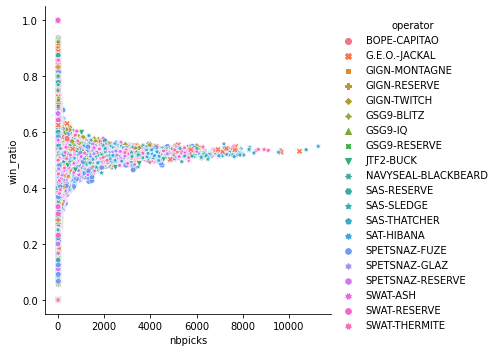

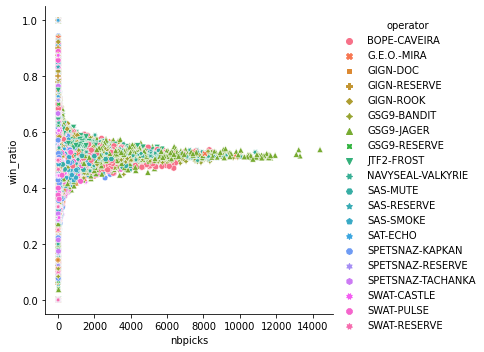

In [182]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_ATK)
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_DEF)
plt.show()

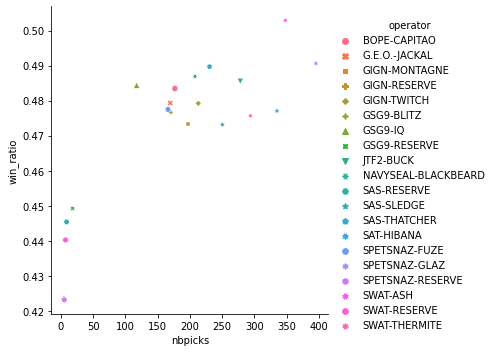

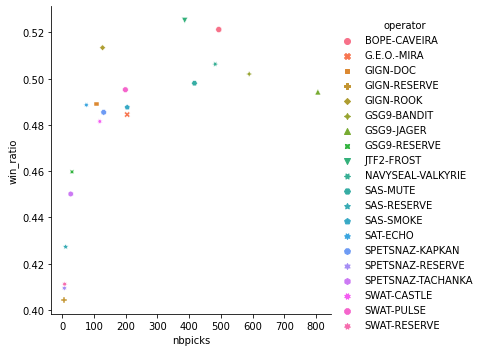

In [183]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_graph_ATK)
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_graph_DEF)
plt.show()

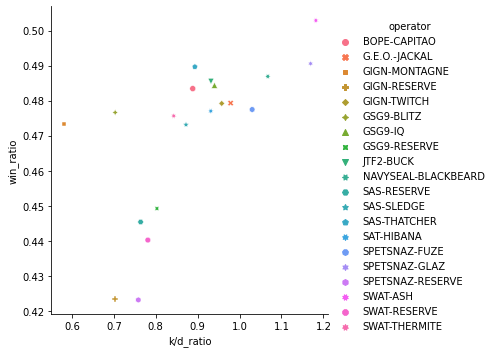

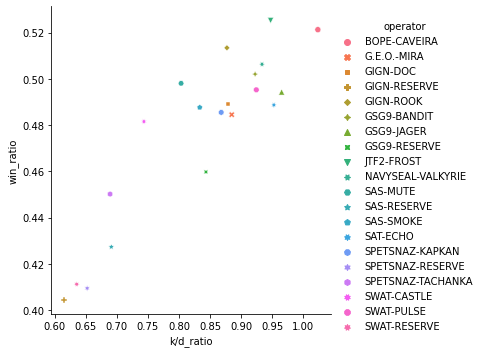

In [184]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=df_graph_ATK)
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=df_graph_DEF)
plt.show()

# 이상치 탐색 ( 불법 프로그램 / 스머프 )

이상치 검색부터 진행, 데이터셋은 밸뱃쉘 시즌의 랭크 데이터고 실제 플레이한 데이터이다. 즉 여기서 이상치가 발견된다면 , 불법프로그램 유저 혹은 스머프 (양학러)일 가능성이 높다

 IQR 사용 

- 말하자면 불법프로그램과 스머프 유저들의 데이터일 확률이 높음 

- 가장 승률이 높은것은 RESERVE ( 예비군 )들 , 기본캐릭터이기 떄문에 핵 실컷 즐기다가 정지당한것으로 보인다. 

- 이상치: 일반적인 값보다 상대적으로 큰 데이터 즉 전체 데이터 패턴에서 동떨어져 있는 관측치 , 평균에 영향을 많이 끼치기에 처리해야 하는 데이터

## Code

In [185]:
def outlier_ATK(target):
   q1=df_ATK[target].quantile(0.25)
   q2=df_ATK[target].quantile(0.5)
   q3=df_ATK[target].quantile(0.75)
   iqr=q3-q1
   condition=df_ATK[target]>q3+1.5*iqr
   df_outlier_ATK=df_ATK[condition].dropna()
   return df_outlier_ATK
   
def outlier_DEF(target):
   q1=df_DEF[target].quantile(0.25)
   q2=df_DEF[target].quantile(0.5)
   q3=df_DEF[target].quantile(0.75)
   iqr=q3-q1
   condition=df_DEF[target]>q3+1.5*iqr
   df_outlier_DEF=df_DEF[condition].dropna()
   return df_outlier_DEF

def graph_ATK():
   df_graph_ATK=(df_outlier_ATK[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_ATK

def graph_DEF():
   df_graph_DEF=(df_outlier_DEF[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_DEF

def except_outlier_ATK():
   df_graph_ATK=(df_ATK[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_ATK

def except_outlier_DEF():
   df_graph_DEF=(df_DEF[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_DEF

df_outlier_ATK = outlier_ATK("win_ratio")
df_outlier_DEF = outlier_DEF("win_ratio")

df_outlier_ATK_kda = outlier_ATK("k/d_ratio")
df_outlier_DEF_kda = outlier_DEF("k/d_ratio")

df_operators_drop_ATK = df_operators[df_operators["role"]=="Attacker"].drop(df_outlier_ATK.index, axis=0)
df_operators_drop_DEF = df_operators[df_operators["role"]=="Defender"].drop(df_outlier_DEF.index, axis=0)

weapone_ATK = df_operators_drop_ATK.copy()
weapone_DEF = df_operators_drop_DEF.copy()

In [186]:
graph_ATK()

,operator,win_ratio,k/d_ratio,nbpicks
0,BOPE-CAPITAO,0.931250,1.317949,4.362162
1,G.E.O.-JACKAL,0.951084,1.208669,3.815693
2,GIGN-MONTAGNE,0.932358,1.221024,4.455446
3,GIGN-RESERVE,0.969929,0.861098,2.632856
4,GIGN-TWITCH,0.946470,1.210799,3.837416
5,GSG9-BLITZ,0.943794,1.105042,4.279412
6,GSG9-IQ,0.934949,1.554215,4.763052
7,GSG9-RESERVE,0.957665,1.047119,3.294294
8,JTF2-BUCK,0.926127,1.503455,4.759259
9,NAVYSEAL-BLACKBEARD,0.897492,1.968541,7.687023


## 그래프 (이상치)

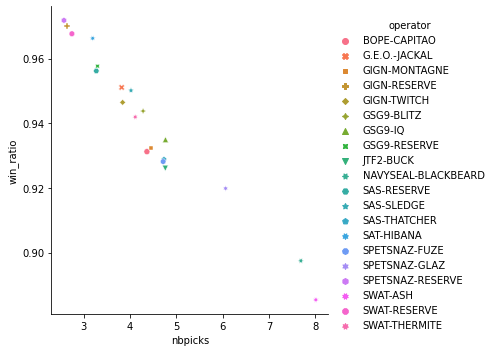

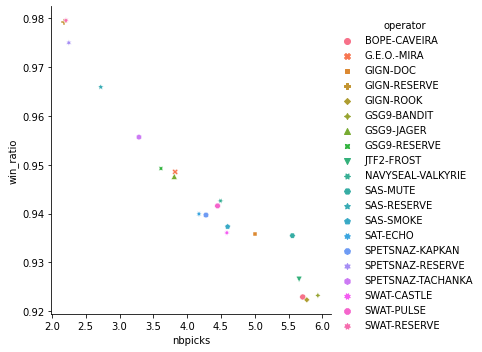

In [187]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=graph_ATK())
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=graph_DEF())
plt.show()

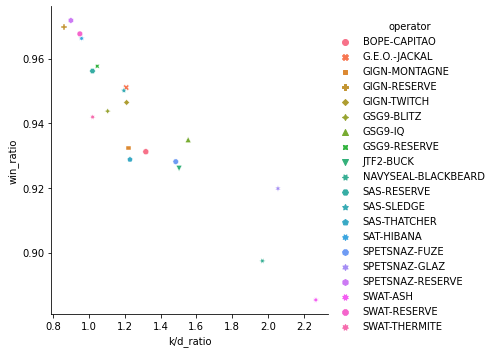

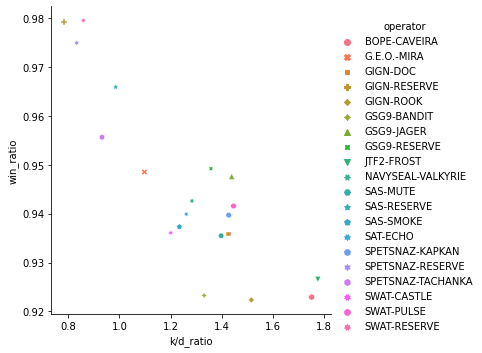

In [188]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=graph_ATK())
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=graph_DEF())
plt.show()

In [189]:
df_ATK = df_ATK.drop(df_outlier_ATK.index, axis=0)
df_DEF = df_DEF.drop(df_outlier_DEF.index, axis=0)

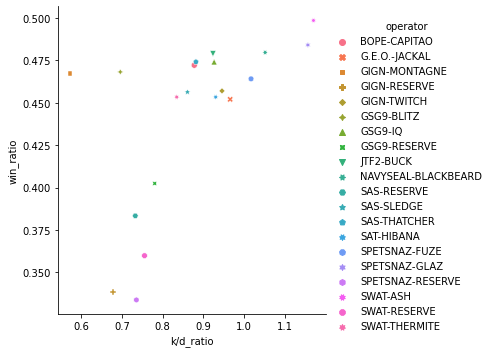

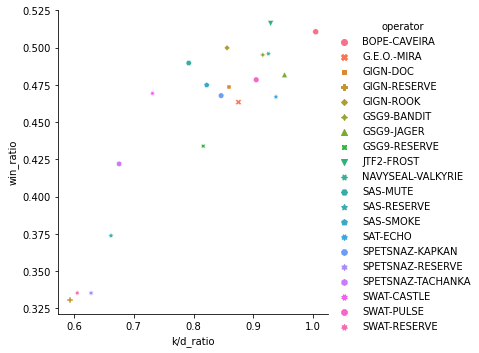

In [190]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=except_outlier_ATK())
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=except_outlier_DEF())
plt.show()

- 결측값을 제외한 데이터

- 예비군들은 아무도 안하는것을 볼 수 있다. 

- 이상치가 있고 없고의 차이가 꽤 큰편 

# 공/수 무기별 KDA ,선호도

- 전체 유저의 무기 선호도 그리고 KDA를 트리구조로 표현해볼생각이다.

- 수비팀은 SG의 성능이 제법 괜찮고 , 왠만해선 한팀에 하나는 챙겨가는 편이다, 

- 그러니 공격팀보다는 수비팀의 샷건 KDA가 좀더 높을것이다( 물론 다른 총기 대비 낮겠지만 ) 

In [191]:
AR = ["PARA-308" , "C7E" , "416-C CARBINE" , "F2" ,"C8-SFW", "AUG A2", "552 COMMANDO","AR33" , "L85A2" , "G36C" , "AK-12" , "R4-C" , "556XI" ,"TYPE-89", "MK17 CQB"] 
SMG = ["PDW9" , "UMP45","MP5" ,"P90" , "9mm C1","VECTOR .45 ACP","9x19VSN" ,"FMG-9", "MP5SD" , "MPX", "MP7" , "M12","MP5K"]  
SG = ["SG-CQB","M1014" , "SASG-12" , "SuperNova" , "SPAS-12" , "M590A1","M870","ITA12L","SUPER 90","SPAS-15",""]
SR = ["HK417" , "C8-SFW"  , "CAMRS" ,"OTs-03","SR-25"]
LMG = ["M249", "G8A1" , "6P41"]

for ar  in AR :
  df_operators_drop_ATK = df_operators_drop_ATK.replace(ar , "AR")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(ar , "AR")
for smg in SMG:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(smg , "SMG")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(smg , "SMG")
for sg in SG:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(sg , "SG")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(sg , "SG")
for sr in SR:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(sr , "SR")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(sr , "SR")
for lmg in LMG:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(lmg , "LMG")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(lmg , "LMG")



In [192]:
ATK_encoder_KD = df_operators_drop_ATK
ATK_encoder_WIN = df_operators_drop_ATK

DEF_encoder_KD = df_operators_drop_DEF
DEF_encoder_WIN = df_operators_drop_DEF

In [193]:
from category_encoders import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

encoder_ATK = OneHotEncoder(use_cat_names= True)
encoder_DEF = OneHotEncoder(use_cat_names= True)

ATK_encoder_KD = encoder_ATK.fit_transform(ATK_encoder_KD)
DEF_encoder_KD = encoder_DEF.fit_transform(DEF_encoder_KD)


결정트리로 각 무기별 KDA를 시각화 하여 한눈에 보고싶다. 하지만 K/D ratio가 float이기에 결정 트리 써먹기가 쉽지 않음 

- 그렇기에 전체값에 *100을 하고 뒷자리 전부 잘라내는 방식으로 진행 

In [194]:
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import accuracy_score
weapon_list_ATK = ["primaryweapon_LMG", "primaryweapon_AR" ,"primaryweapon_SMG","primaryweapon_Shield","primaryweapon_SR","primaryweapon_SG"]
weapon_list_DEF = [ "primaryweapon_AR" ,"primaryweapon_SMG","primaryweapon_SG"]

In [195]:
def DTR_ATK(target):
  tree_reg_ATK = DecisionTreeRegressor()

  col_ATK = ATK_encoder_KD[weapon_list_ATK]

  target = ATK_encoder_KD[[target]]

  X_train , X_test , y_train, y_test = train_test_split(col_ATK , target , test_size = 0.2 , random_state=11)
  tree_reg_ATK.fit(X_train, y_train)
  y_pred=tree_reg_ATK.predict(X_test)
  accur=tree_reg_ATK.score(X_test,y_pred)

  return print(accur)


def DTR_DEF(target):
  tree_reg_DEF = DecisionTreeRegressor()

  col_DEF = DEF_encoder_KD[weapon_list_DEF]

  target = DEF_encoder_KD[[target]]

  X_train , X_test , y_train, y_test = train_test_split(col_DEF , target , test_size = 0.2 , random_state=11)
  tree_reg_DEF.fit(X_train, y_train)

  y_pred=tree_reg_DEF.predict(X_test)
  accur=tree_reg_DEF.score(X_test,y_pred)
  return print(accur)

def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)
#print('R2', tree.score(col, target))
#show_tree(tree, colnames=col.columns)
#X_col , y_test = pd.DataFrame(data=cols) , 

In [196]:
DTR_ATK("k/d_ratio")
DTR_DEF("k/d_ratio")
DTR_ATK("win_ratio")
DTR_DEF("win_ratio")

1.0
1.0
1.0
1.0


In [197]:
def TREE_ATK(target):
  col_ATK = ATK_encoder_KD[ATK_encoder_KD.columns]
  target_ATK = ATK_encoder_KD[target]
  tree_ATK = DecisionTreeRegressor()
  tree_ATK.fit(col_ATK[weapon_list_ATK], target_ATK)

  return tree_ATK

def TREE_DEF(target):
  col_DEF = DEF_encoder_KD[DEF_encoder_KD.columns]
  target_DEF = DEF_encoder_KD[["k/d_ratio"]]
  tree_DEF = DecisionTreeRegressor()
  tree_DEF.fit(col_DEF[weapon_list_DEF], target_DEF)

  return tree_DEF

#show_tree(DTR_ATK("k/d_ratio"), colnames=ATK_encoder_KD.columns)


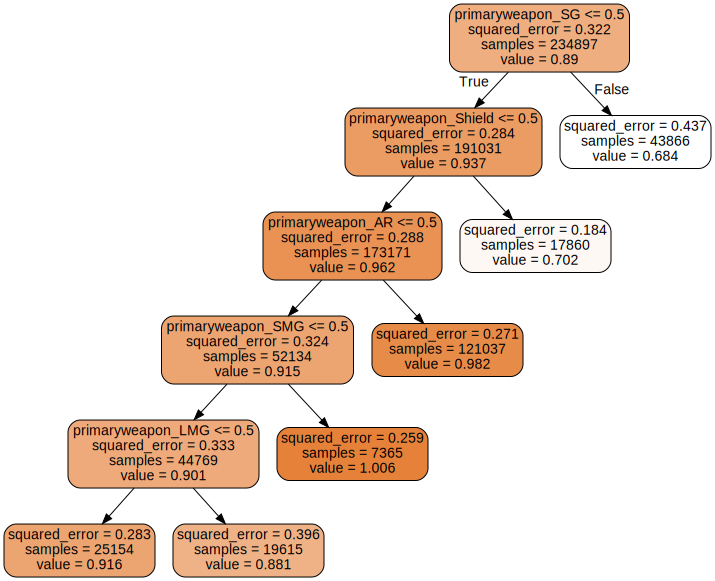

In [198]:
show_tree(TREE_ATK("k/d_ratio"), colnames=weapon_list_ATK)


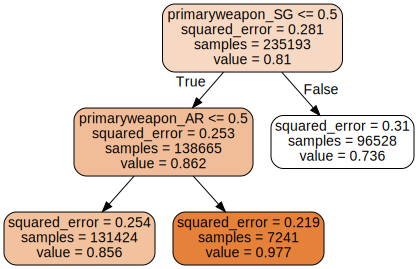

In [199]:
show_tree(TREE_DEF("k/d_ratio"), colnames=weapon_list_DEF)

- 이 트리를 사용한 이유는
   - 트리 그래프로 한눈에 보고 싶었다. 

   - 단순히 해당 무기를 들고 갔을때 실전에서 어느정도의 KDA를 뽑아내는지를 보고싶었다. 

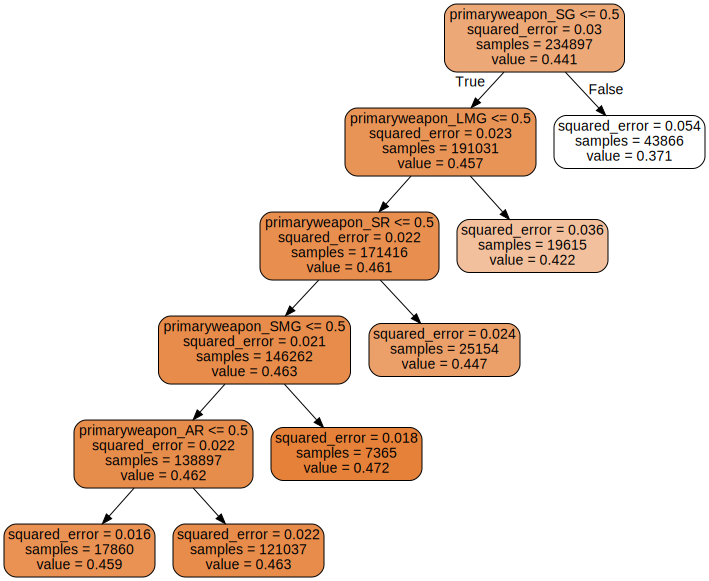

In [200]:
show_tree(TREE_ATK("win_ratio"), colnames=weapon_list_ATK)


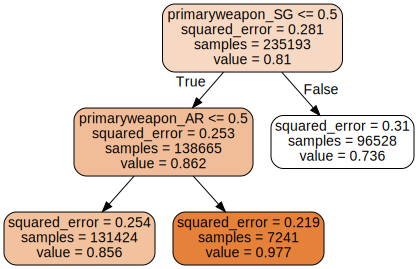

In [201]:
show_tree(TREE_DEF("win_ratio"), colnames=weapon_list_DEF)

- 단순히 총기 종류로만 예측을 하였으므로 

- 평생 PC로만 FPS게임을 플레이해왔더니 한가지 궁금증이 생겼다 . 

- 콘솔로 플레이하는 사람들은 선호하는 무기가 다를까? 

- 만약 선호하는 무기가 다르고, 각 캐릭터별 주력 총기가 다르다면, 밸런스 패치를 다르게 진행해야한다

- 머리한번만 쏘면 죽는 게임이 PC는 SMG와 AR이 지배하다 싶이 하지만 조준이 어려운 콘솔은 샷건의 선호도가 좀 더 높지 않을까 싶다  

- 플랫폼별 KDA를 확인해봄 
- PC는 공/수 KDA가 비슷하지만 

- 콘솔들은 뭔가 좀 심각하다 , 머리 맞추면 끝나는 게임이기도 하고, 먼저 조준하고 있는 입장이 훨씬 유리할텐데...

- ...그런데 이렇게 차이가 나는데 그냥 똑같이 밸런스를 맞췄다고?

# 플랫폼별 승률, KDA 차이 

In [202]:
print("DEF_K/DA",df_operators_drop_DEF[["platform","k/d_ratio"]].groupby("platform").mean())
print()
print("ATK_K/DA",df_operators_drop_ATK[["platform","k/d_ratio"]].groupby("platform").mean())

DEF_K/DA           k/d_ratio
platform           
PC         0.845214
PS4        0.794322
XONE       0.798116

ATK_K/DA           k/d_ratio
platform           
PC         0.858801
PS4        0.901558
XONE       0.903808


In [203]:
print("DEF_win", df_operators_drop_DEF[["platform","win_ratio"]].groupby("platform").mean())
print()
print("ATK_win", df_operators_drop_ATK[["platform","win_ratio"]].groupby("platform").mean())

DEF_win           win_ratio
platform           
PC         0.449866
PS4        0.450440
XONE       0.450463

ATK_win           win_ratio
platform           
PC         0.400803
PS4        0.459416
XONE       0.453613


- 콘솔에서는 평균적으로 공격팀의 평균 KDA가 더 높음, 교전시 공격팀이 더욱 유리한것을 볼수 있음, ㅌ 

- 평균적으로 콘솔의 공수 승률은 비슷하다, 하지만 PC의 승률은 차이가 있는데 이는 수비팀이 공격팀보다 유리하다는것을 의미함 

In [204]:
df_operators_drop_ATK = df_operators_drop_ATK.replace("PS4" , "CONSOLE").replace("XONE","CONSOLE")
df_operators_drop_DEF = df_operators_drop_DEF.replace("PS4" , "CONSOLE").replace("XONE","CONSOLE")

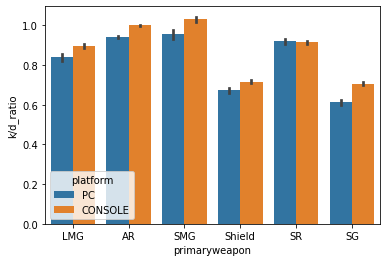

In [205]:
sns.barplot(data=df_operators_drop_ATK,
            x="primaryweapon",
            y="k/d_ratio",
            hue="platform")

샷건이 KDA차이가 꽤 심하게 났다 . 그리고 전체적으로 콘솔의 KDA가 높게 나왔다 . 
다른총기에서 긴가민가 했는데 샷건 데이터에서 알수있는것은 콘솔유저들은 헤드샷을 잘 맞추지 못한다. 현재 데이터에 헤드샷 사인이 있다면 확실하게 알수 있었겠지만 없으니...

공격팀의 무장은 몇몇 오퍼레이터들을 제외하곤 화력으로 압도할수 있다. 그렇기에 서로 화력싸움을 하는 비율이 높기에 수비팀보다 콘솔의 KDA가 높은듯 하다. 

샷건의 경우 헤드샷을 맞기 전에 샷건으로 쏴죽여버린듯 

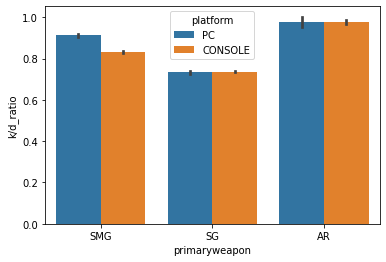

In [206]:
sns.barplot(data=df_operators_drop_DEF,
            x="primaryweapon",
            y="k/d_ratio",
            hue="platform")

- PC와 CONSOLE의 차이나는것을 보아 PC의 SMG 사용자는 헤드샷노려 화력차이를 이겨낸것으로 보인다 .

- 콘솔은 머리 맞추기가 힘드니 KDA까 차이가 남 



In [207]:
weapone_ATK=weapone_ATK.replace("XONE","CONSOLE")
weapone_ATK=weapone_ATK.replace("PS4","CONSOLE")

weapone_DEF=weapone_DEF.replace("XONE","CONSOLE")
weapone_DEF=weapone_DEF.replace("PS4","CONSOLE")

In [208]:
PC_ATK = weapone_ATK[weapone_ATK["platform"]=="PC"]
CONSOLE_ATK = weapone_ATK[(weapone_ATK["platform"]=="CONSOLE") ]

PC_DEF = weapone_DEF[weapone_DEF["platform"]=="PC"]
CONSOLE_DEF = weapone_DEF[(weapone_DEF["platform"]=="CONSOLE") ]

In [209]:
def weapon_chart_PC_ATK(target ,x, y):
    weapone_ATK_PC= PC_ATK.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_ATK_PC[target], y=weapone_ATK_PC.index, data=weapone_ATK_PC).set_title("PC_ATK")

def weapon_chart_PC_DEF(target, x, y):
    weapone_ATK_PC= PC_ATK.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_ATK_PC[target], y=weapone_ATK_PC.index, data=weapone_ATK_PC).set_title("PC_ATK")

def weapon_chart_CON_ATK(target,x,y):
    weapone_ATK_CON= CONSOLE_ATK.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_ATK_CON[target], y=weapone_ATK_CON.index, data=weapone_ATK_CON).set_title("CON_ATK")

def weapon_chart_CON_DEF(target, x, y):
    weapone_DEF_CON= CONSOLE_DEF.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_DEF_CON["win_ratio"], y=weapone_DEF_CON.index, data=weapone_DEF_CON).set_title("CON_DEF")

Text(0.5, 1.0, 'CON_DEF')

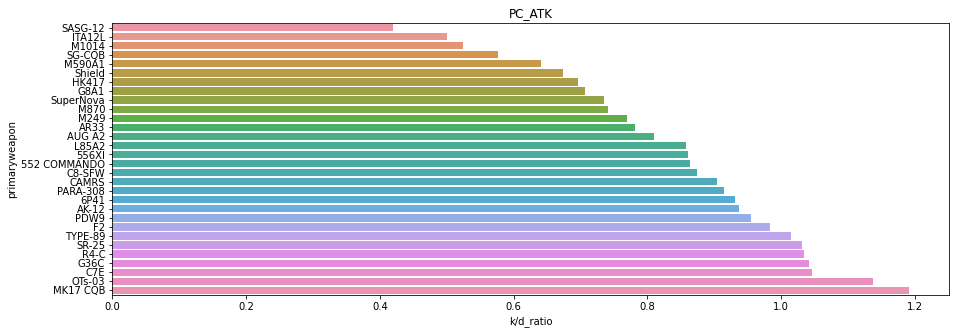

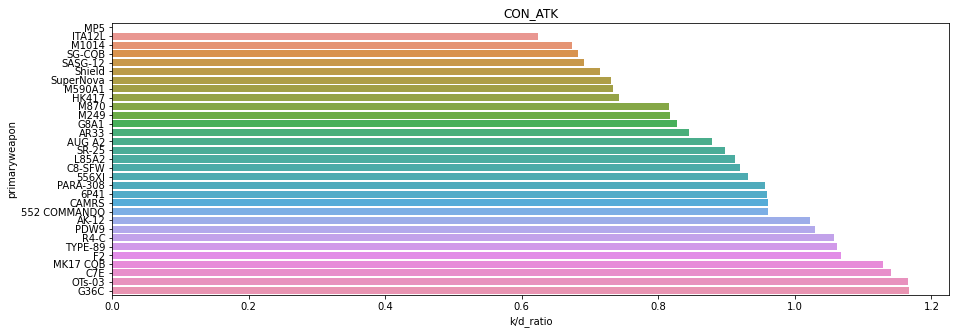

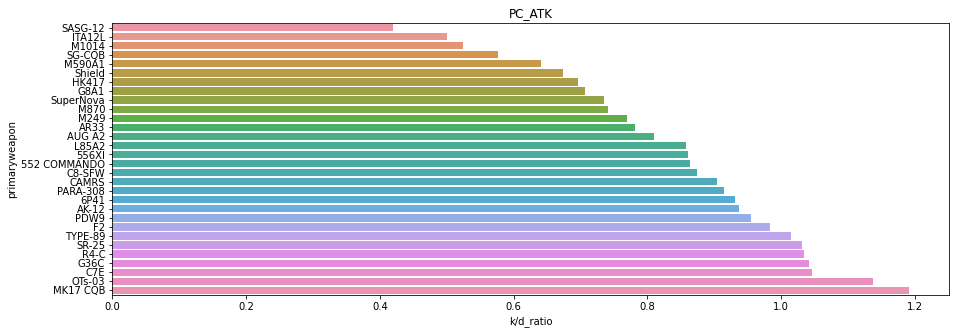

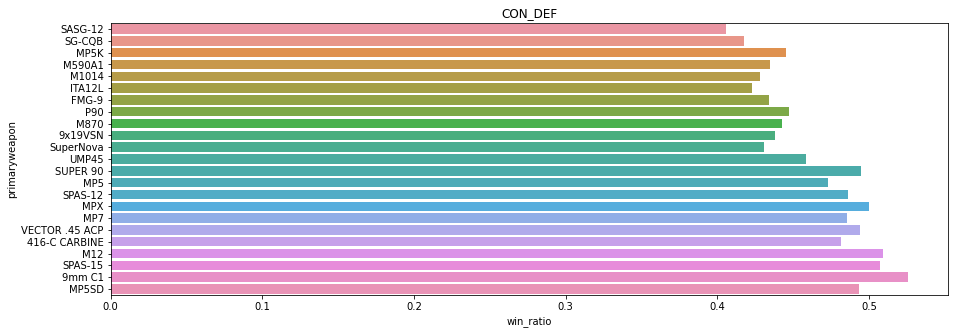

In [210]:
weapon_chart_PC_ATK("k/d_ratio",15,5)
weapon_chart_CON_ATK("k/d_ratio",15,5)

weapon_chart_PC_DEF("k/d_ratio",15,5)
weapon_chart_CON_DEF("k/d_ratio",15,5)

Text(0.5, 1.0, 'CON_DEF')

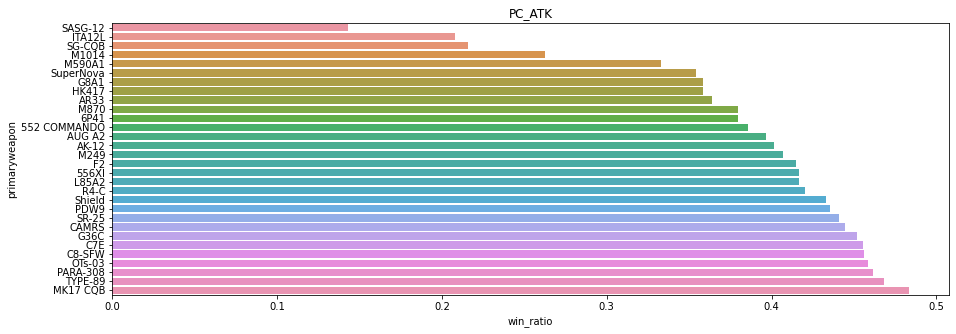

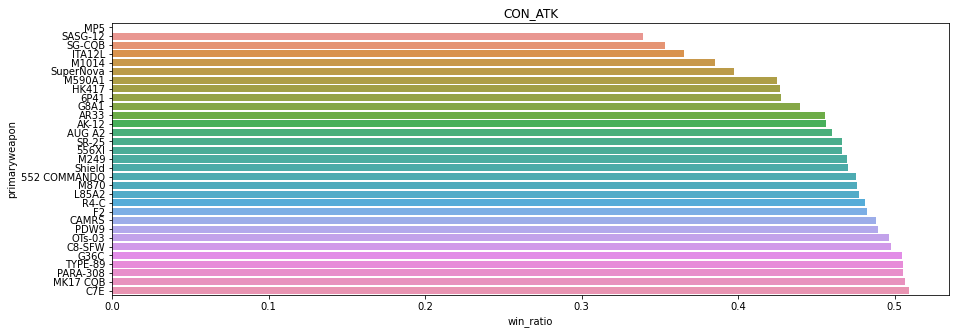

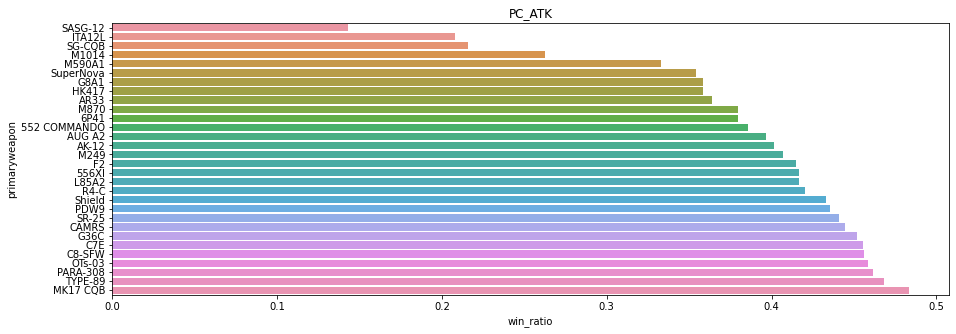

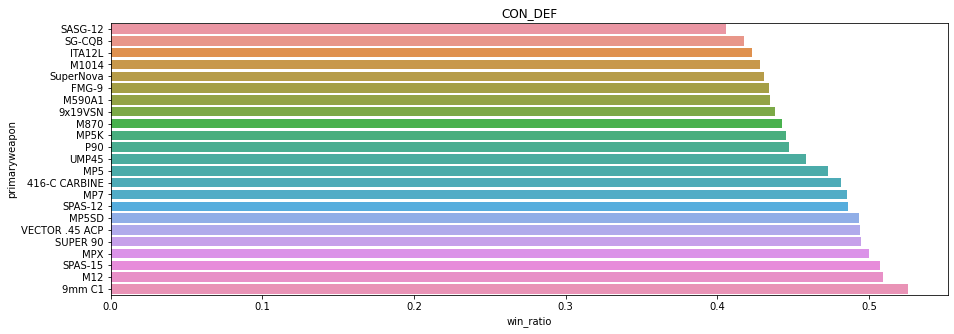

In [211]:
weapon_chart_PC_ATK("win_ratio",15,5)
weapon_chart_CON_ATK("win_ratio",15,5)

weapon_chart_PC_DEF("win_ratio",15,5)
weapon_chart_CON_DEF("win_ratio",15,5)

# 맵별 공수 승률

여기 플랫폼은 전부 PC뿐이다


In [212]:
INDEX_obj    = df_objectives[df_objectives["nbdeaths"]==0].index
df_objectives= df_objectives.drop(INDEX_obj)

In [213]:
objectives_BOMB = df_objectives[df_objectives["gamemode"]=="PvP . BOMB"]

In [214]:
objectives_BOMB=objectives_BOMB[["mapname","objectivelocation","skillrank","role","operator","k/d_ratio","win_ratio"]].sort_values(by="win_ratio")


In [215]:
def map_graph(target_x, target_y , HUE , DATA):  
   plt.figure(figsize=(6,6))
   return sns.barplot(data=DATA,
                y=target_y,
                x=target_x,
                hue=HUE)

In [216]:
objectives_BOMB#=objectives_BOMB[objectives_BOMB["skillrank"]=="Platinum"]

,mapname,objectivelocation,skillrank,role,operator,k/d_ratio,win_ratio
0,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,0.000000,0.0
851486,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Gold,Defender,BOPE-CAVEIRA,0.000000,0.0
851488,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Gold,Defender,GIGN-DOC,0.500000,0.0
671909,FAVELAS,2F AUNT'S BEDROOM / 1F AUNT'S APARTMENT,Bronze,Attacker,SAT-HIBANA,0.000000,0.0
671907,FAVELAS,1F BIKER'S APARTMENT / 1F BIKER'S BEDROOM,Unranked,Defender,SWAT-CASTLE,0.000000,0.0
...,...,...,...,...,...,...,...
299336,KAFE DOSTOYEVSKY,BAR / COCKTAIL LOUNGE,Unranked,Attacker,SPETSNAZ-GLAZ,0.000000,1.0
907439,HOUSE,LIVING ROOM / TRAINING ROOM,Unranked,Attacker,SAS-SLEDGE,1.000000,1.0
907440,HOUSE,LIVING ROOM / TRAINING ROOM,Unranked,Attacker,SPETSNAZ-FUZE,1.000000,1.0
299284,KAFE DOSTOYEVSKY,BAR / COCKTAIL LOUNGE,Platinum,Defender,GIGN-DOC,2.000000,1.0


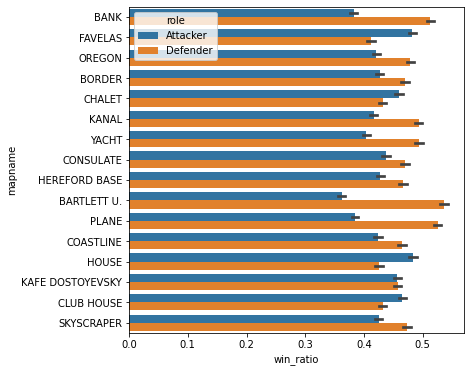

In [217]:
map_graph("win_ratio","mapname","role",objectives_BOMB)

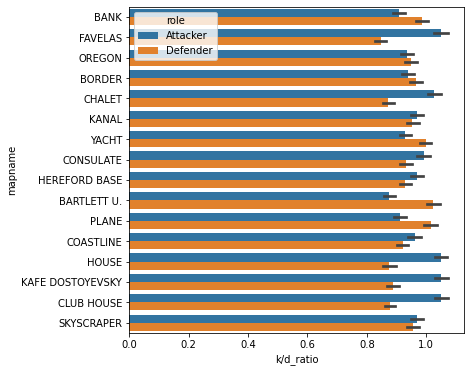

In [218]:
map_graph("k/d_ratio","mapname","role",objectives_BOMB)

- 공격팀이 KDA가 더 높더라도 승률은 수비팀과 비슷하거나 수비팀이 더 높다. 이는 공격팀이 적을 많이 사살하였더라도 , 수비팀은 시간초과라는 추가 승리조건이 있기에 이덕에 승리하는것으로 보임 - > 추가 편집 요망 

- BANK    
   - EXECUTIVE LOUNGE / CEO OFFICE = 2층 
   - LOCKERS / CCTV ROOM  = 지하
   - STAFF ROOM / OPEN AREA  1층
   - TELLERS OFFICE 1층 


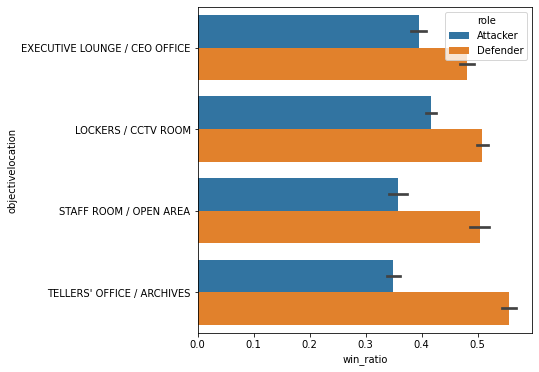

In [219]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(["BANK"])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST) 


- CLUB HOUST 
   - GYM / BEDROOM  2층
   - CHRUCH / ARSENAL ROOM 지하 
   - CCTV ROOM / CASH ROOM 2층
   - BAR / STOCK ROOM  1층 

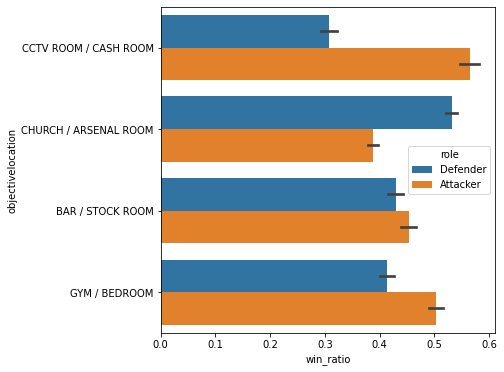

In [220]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(['CLUB HOUSE'])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST) 

- COASTLINE
   - HOOKAH LOUNGE / 2F BILLIARDS ROOM  2층
   - PENTHOUSE/ THEATHER 2층 
   - KITCHEN / SERVICE ENTRANCE 
   - 1F BLUE BAR /1F SUNRISE BAR 1층 

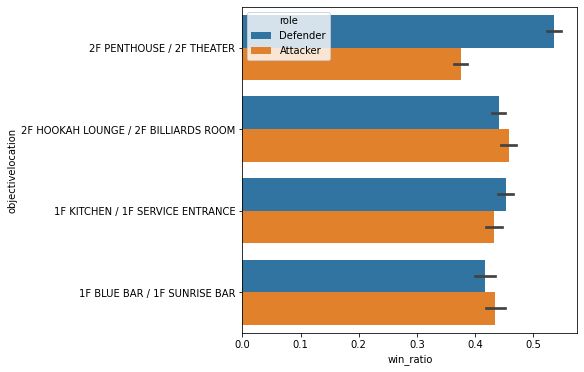

In [221]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(["COASTLINE"])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST) 

# 불법프로그램 사용자, 스머프 추정 유저 분리 

In [222]:
df_outlier_ATK["hax"]=1
df_ATK["hax"]=0

In [223]:
df_rfs=pd.concat([df_outlier_ATK,df_ATK])

픽이 많이되었을수록 핵이 아닌 경향이 있음 = 핵은 정지당해서 오래 못함 

In [224]:
features = df_rfs[["win_ratio", "k/d_ratio","nbpicks"]]
target = df_rfs["hax"]

X_train ,X_test, y_train, y_test = train_test_split(features,target)

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [226]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [227]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9992929114371575
0.9995982515909237


일단 잘 맞춘다. 하지만 본 데이터들은 "핵 혹은 , 스머프 의심 데이터들이다"

- 사실상 스머프는 잡기 힘들다. 그냥 잘하는데 못올라가는 경우도 있으니, 이건 운영적인 부분으로 잡아야한다 . (부계정을 못만들게 한다던가) 

- 하지만 불법프로그램에 본 모델을 사용 가능하다. 

- 유저의 이상이 감지된 데이터가 많아지면 많아질수록 좀 더 주의깊게 본다거나. 

- 이상이 발견된 데이터들을 우선적으로 처리하여 불법프로그램 이용자를 좀 더 빠르게 색출이 가능할것 같음 .

- 